In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

## Data pre-processing

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Take the path to a directory and import the images

train_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\train'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),
                                                    batch_size=10, class_mode='categorical')

val_dir = 'E:\\Study\\TRU\\4 Fourth Year\\Fall 2022 - University of Salford\\Deep Learning\\Assessment\\Data\\signlang\\signlang\\val'
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(128,128),
                                                 batch_size=10, class_mode='categorical')

#  Find the labels of the digits

class_dictionary = train_generator.class_indices
class_dictionary = { value:key for key,value in class_dictionary.items()}
class_list = [value for _,value in class_dictionary.items()]
print(class_list)

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Define the network

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras import models, layers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2

resnet_model = ResNet50V2(input_shape=(128,128,3), include_top=False, weights='imagenet')
network = resnet_model.output
network = Flatten()(network)
network = Dense(512, activation='relu')(network)
network = Dense(10, activation='softmax')(network)

model = Model(inputs = resnet_model.input , outputs = network)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']         

 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 32, 32, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
          

 conv3_block2_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 16, 16, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
          

                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 10, 10, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 conv4_block3_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block3_2_relu[0][0]']    
                                                                                                  
 conv4_block3_out (Add)         (None, 8, 8, 1024)   0           ['conv4_block2_out[0][0]',       
                                                                  'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 8, 8, 1024)  4096        ['conv4_block3_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_block4_preact_relu (Acti  (None, 8, 8, 1024)  0           ['conv4_block4_preact_bn[0][0]'] 
 vation)                                                                                          
          

 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 4, 4, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 max_pooli

 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 4, 4, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 4, 4, 512)    1048576     ['conv5_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
          

## Initialize earlystopping callback and train the network

In [4]:
from keras import callbacks

# Initialize earlystopping callback
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience=3, 
                                        restore_best_weights=True)

digits_train_model = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystopping])

Epoch 1/10
193/193 [==============================] - 314s 2s/step - loss: 1.1841 - accuracy: 0.7081 - val_loss: 135.6500 - val_accuracy: 0.2080
Epoch 2/10
193/193 [==============================] - 288s 1s/step - loss: 0.7450 - accuracy: 0.8201 - val_loss: 271.2959 - val_accuracy: 0.1004
Epoch 3/10
193/193 [==============================] - 283s 1s/step - loss: 0.4654 - accuracy: 0.8657 - val_loss: 0.5049 - val_accuracy: 0.8467
Epoch 4/10
193/193 [==============================] - 277s 1s/step - loss: 0.1565 - accuracy: 0.9502 - val_loss: 0.2324 - val_accuracy: 0.9197
Epoch 5/10
193/193 [==============================] - 284s 1s/step - loss: 0.1389 - accuracy: 0.9627 - val_loss: 0.7905 - val_accuracy: 0.8704
Epoch 6/10
193/193 [==============================] - 281s 1s/step - loss: 0.1108 - accuracy: 0.9684 - val_loss: 0.2200 - val_accuracy: 0.9361
Epoch 7/10
193/193 [==============================] - 303s 2s/step - loss: 0.1657 - accuracy: 0.9544 - val_loss: 1.8311 - val_accuracy: 0.

## Evaluate performance

In [5]:
scores = model.evaluate(val_generator, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.61%


## Learning curves

In [6]:
# Save the history 

import pickle

dictionary_data = digits_train_model.history
history_file = open("model_data_resnet.pkl", "wb")
pickle.dump(dictionary_data, history_file)
history_file.close()


In [7]:
# load the history 

import pickle

history_file = open("model_data_resnet.pkl", "rb")
history = pickle.load(history_file)
history_file.close()
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1,len(acc)+1)

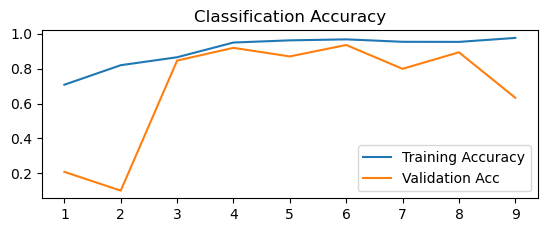

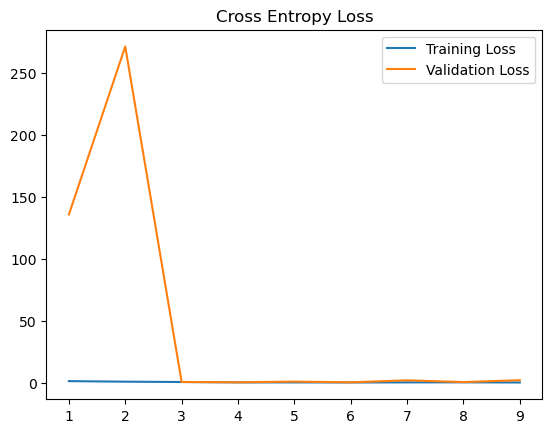

In [9]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy

plt.subplot(211)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Acc')
plt.title('Classification Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.legend()

plt.show()
